In [128]:
options(scipen=999)

In [33]:
library(dplyr); library(ggplot2); library(ggthemes);

In [7]:
transcripts <- read.csv('../input/transcripts.csv',stringsAsFactors=F, header = T)
main <- read.csv('../input/ted_main.csv',stringsAsFactors=F, header = T)

### Total Number of Rows/Entries in the Main Dataset

In [8]:
nrow(main)

[1] 2550

### Entries with more >= 1M views

In [65]:
paste0('Total Number of videos with more than 1M views: ',main %>% filter(views > 1000000) %>% count() )
paste0('% of videos with more than 1M views: ', round((main %>% filter(views > 1000000) %>% count() / nrow(main))*100,2),'%')

[1] "Total Number of videos with more than 1M views: 1503"

[1] "% of videos with more than 1M views: 58.94%"

###  Not so one-trick Pony!

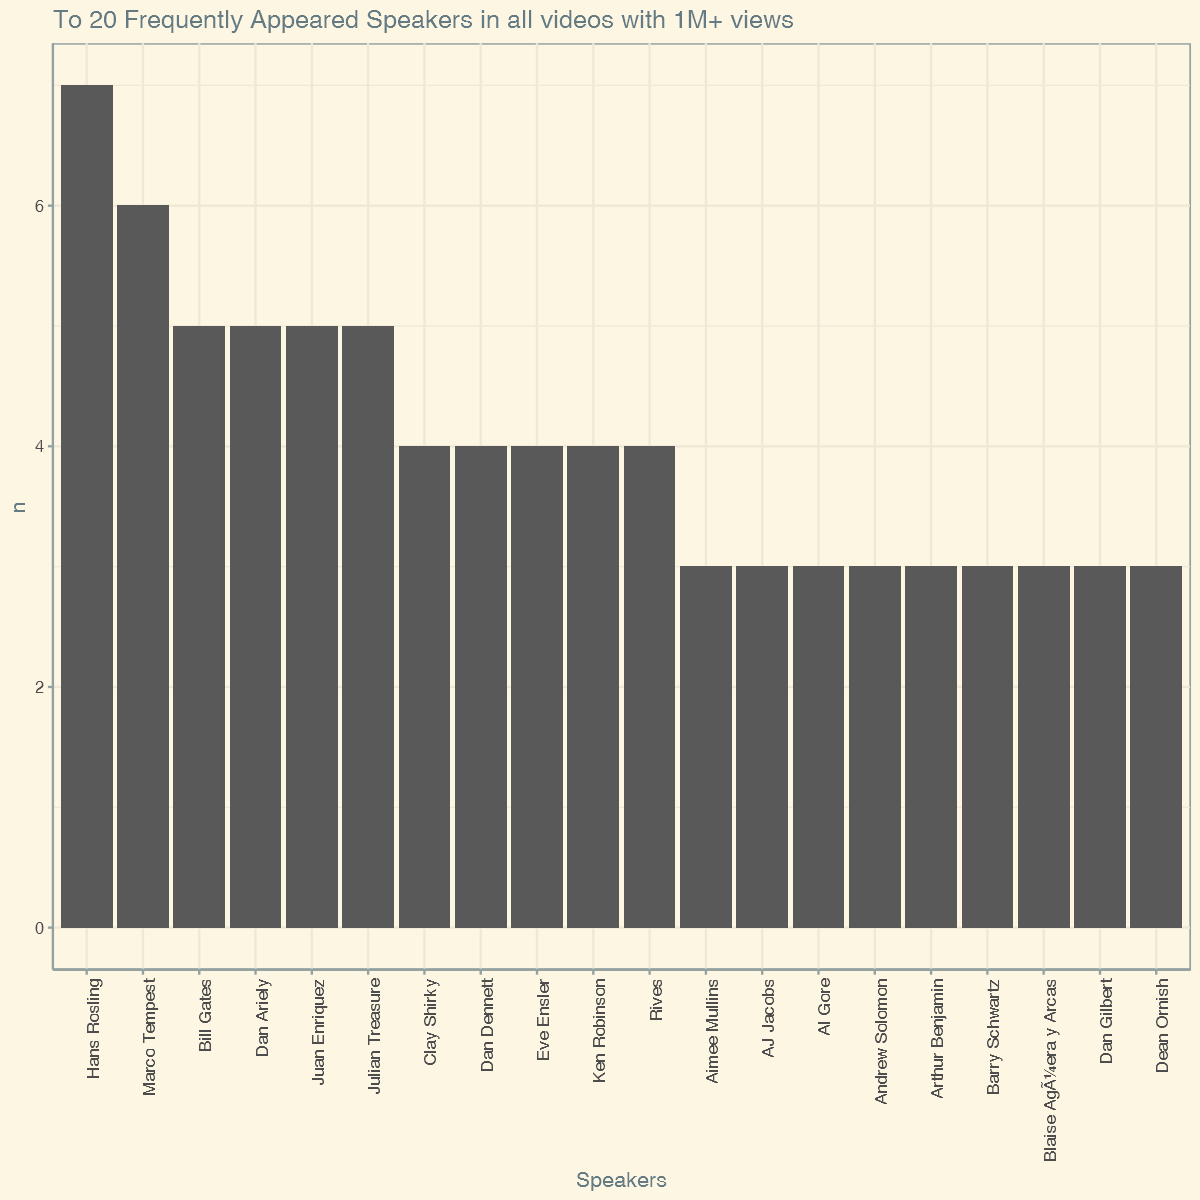

In [129]:
main %>% filter(views > 1000000) %>% 
group_by(main_speaker) %>% 
count() %>% 
filter(n >2) %>% 
arrange(desc(n)) %>% 
head(20) %>% 
ggplot() + geom_bar(aes(reorder(main_speaker,-n),n),stat='identity') + theme_solarized() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('Speakers') + 
ggtitle('To 20 Frequently Appeared Speakers in all videos with 1M+ views')

### Less Time More Impact 

In [86]:
main %>% filter(views > 1000000) %>% arrange(duration) %>% slice(1:10) %>% select('name','duration','views','event')

name,duration,views,event
"Derek Sivers: Weird, or just different?",162,2835976,TEDIndia 2009
"Paolo Cardini: Forget multitasking, try monotasking",172,2324212,TEDGlobal 2012
"Mitchell Joachim: Don't build your home, grow it!",176,1332785,TED2010
Arthur Benjamin: Teach statistics before calculus!,178,2175141,TED2009
Terry Moore: How to tie your shoes,179,6263759,TED2005
"Malcolm London: ""High School Training Ground""",180,1188177,TED Talks Education
Bobby McFerrin: Watch me play ... the audience!,184,3302312,World Science Festival
Derek Sivers: How to start a movement,189,6475731,TED2010
"Bruno Maisonnier: Dance, tiny robots!",189,1193896,TEDxConcorde
Dean Ornish: Your genes are not your fate,192,1384333,TED2008


### Skeeeeewed Views

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


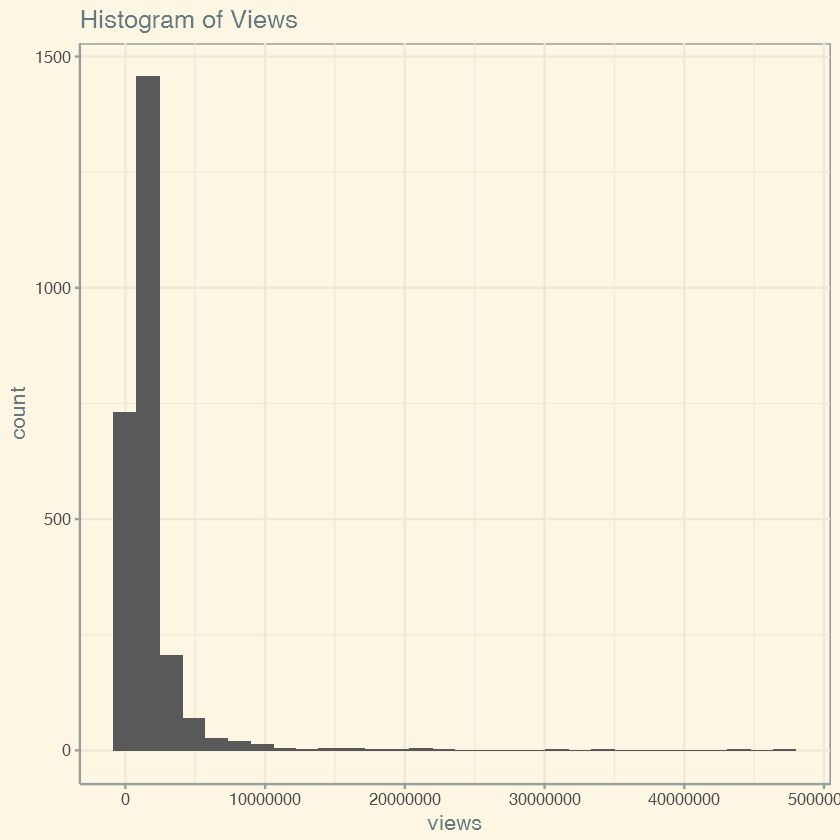

In [41]:
ggplot(main) + geom_histogram(aes(views)) + ggtitle('Histogram of Views') + theme_solarized()

In [47]:
main$first_letter <- substr(main$main_speaker,1,1)

### J/S/A - Seems the magical First Letter!

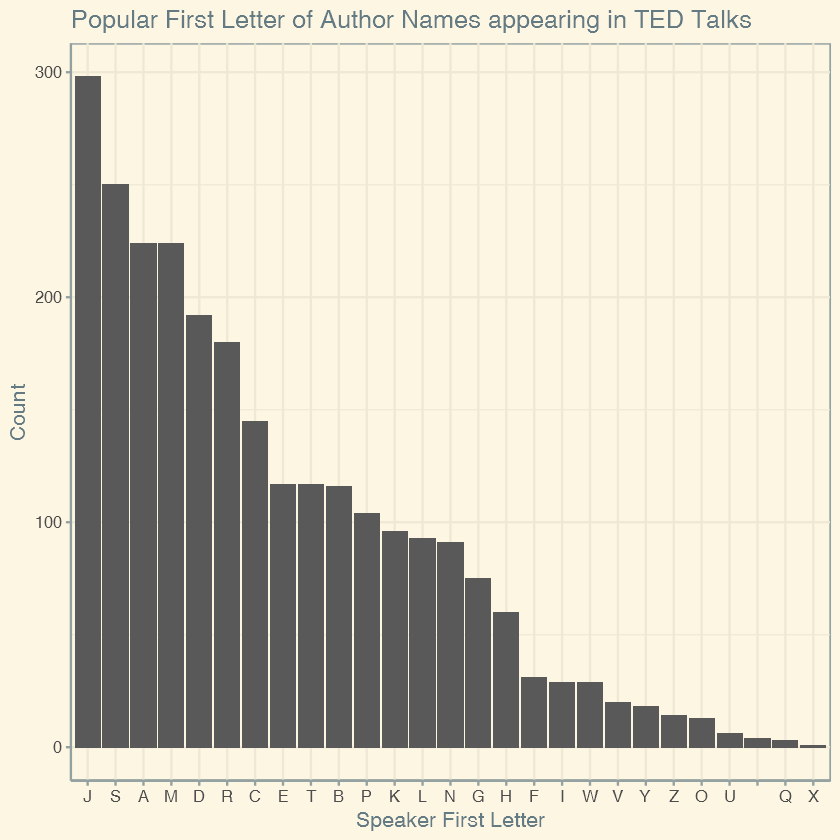

In [48]:
main %>% 
group_by(first_letter = toupper(first_letter)) %>% 
count() %>% 
arrange(desc(n)) %>% 
ggplot() + 
geom_bar(aes(reorder(first_letter,-n),n),stat = 'identity') + theme_solarized() + 
xlab('Speaker First Letter') +
ylab('Count') + 
ggtitle('Popular First Letter of Author Names appearing in TED Talks')

In [56]:
tedx <- main %>% filter(grepl('tedx',tolower(event)))

tedx %>% count()

n
471


### TEDx %in% TED

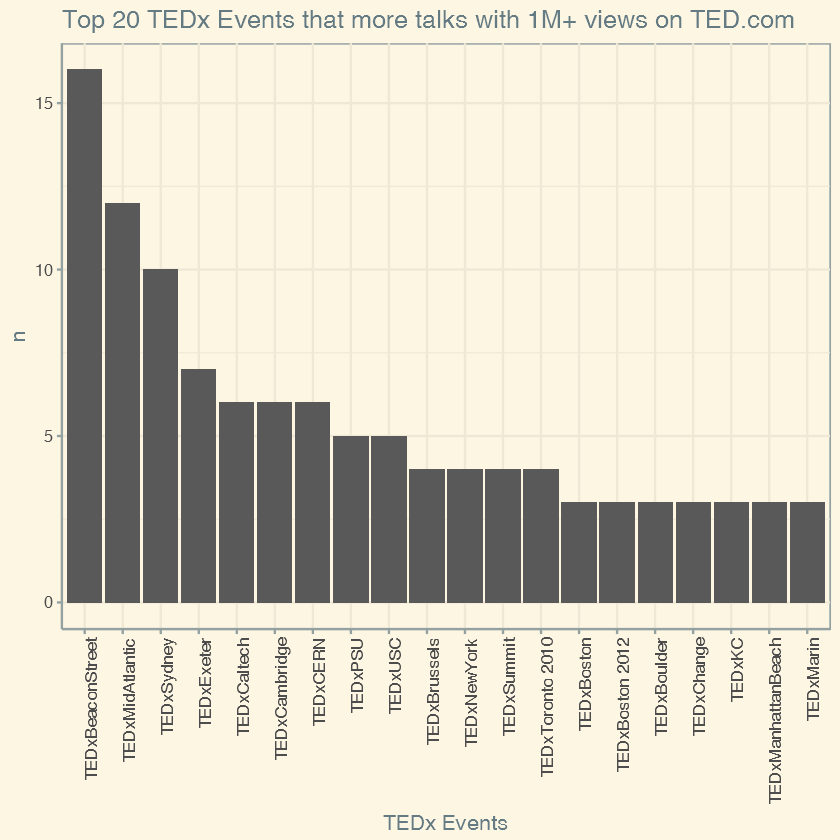

In [87]:
tedx %>% filter(views > 1000000) %>% 
group_by(event) %>% 
count() %>% 
filter(n >2) %>% 
arrange(desc(n)) %>% 
head(20) %>% 
ggplot() + geom_bar(aes(reorder(event,-n),n),stat='identity') + theme_solarized() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + xlab('TEDx Events') + 
ggtitle('Top 20 TEDx Events that more talks with 1M+ views on TED.com')

### Top Comments - Atheism/Schools/Science!

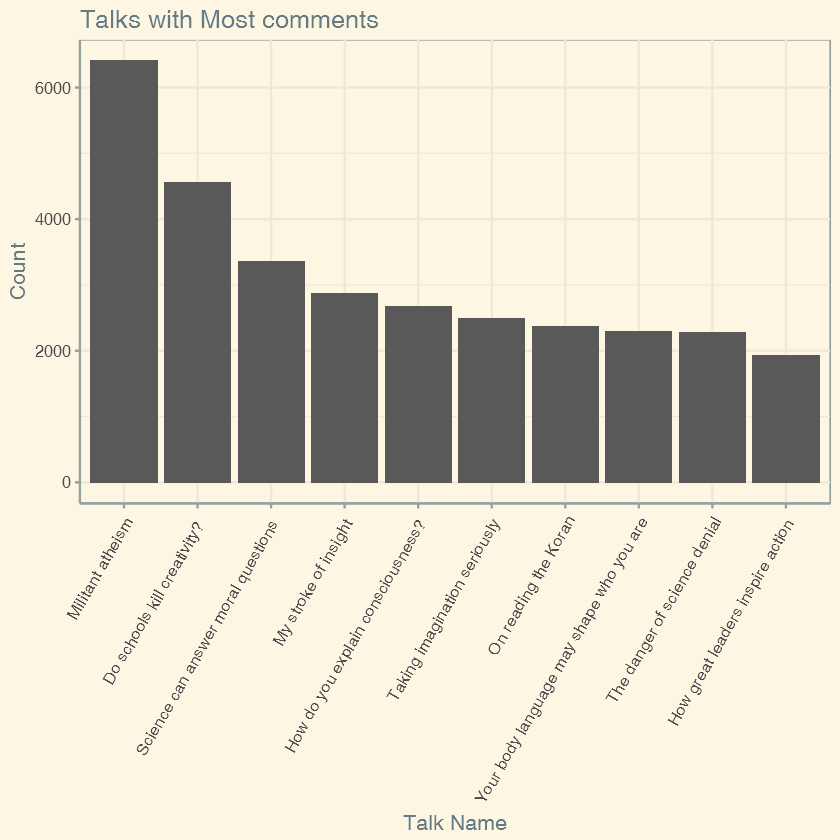

In [98]:
main %>% 
arrange(desc(comments)) %>% 
head(10) %>% 
ggplot() + 
geom_bar(aes(reorder(title,-comments),comments),stat = 'identity') + theme_solarized() + 
xlab('Talk Name') +
ylab('Count') + 
ggtitle('Talks with Most comments') + 
theme(axis.text.x = element_text(angle = 60, hjust = 1)) 

In [108]:
transcripts$first_word <- unlist(lapply(transcripts$transcript, function(x) strsplit(x," ")[[1]][1]))

### Narcissim ?

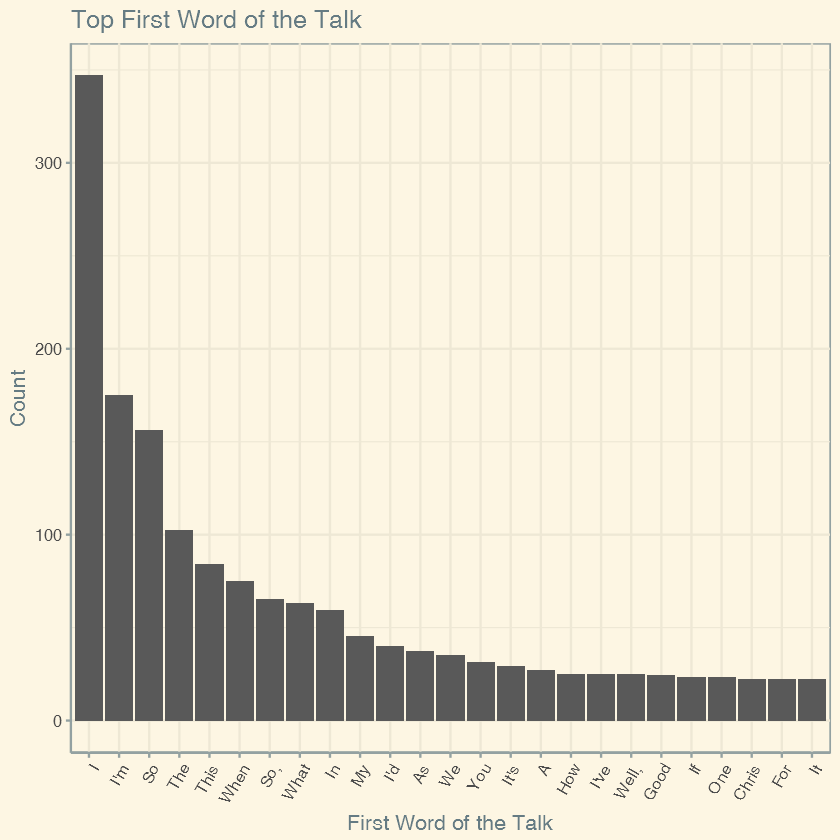

In [112]:
transcripts %>% group_by(first_word) %>% count() %>% arrange(desc(n)) %>% head(25) %>%
ggplot() + 
geom_bar(aes(reorder(first_word,-n),n),stat = 'identity') + theme_solarized() + 
xlab('First Word of the Talk') +
ylab('Count') + 
ggtitle('Top First Word of the Talk') + 
theme(axis.text.x = element_text(angle = 60, hjust = 1))